<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#理论部分：Cholesky分解法" data-toc-modified-id="理论部分：Cholesky分解法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>理论部分：Cholesky分解法</a></span><ul class="toc-item"><li><span><a href="#Cholesky分解实用算法" data-toc-modified-id="Cholesky分解实用算法-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cholesky分解实用算法</a></span></li><li><span><a href="#前/回代法（Forward/Backward-Substitution）" data-toc-modified-id="前/回代法（Forward/Backward-Substitution）-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>前/回代法（Forward/Backward Substitution）</a></span></li></ul></li><li><span><a href="#实现代码" data-toc-modified-id="实现代码-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>实现代码</a></span><ul class="toc-item"><li><span><a href="#Cholesky分解" data-toc-modified-id="Cholesky分解-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cholesky分解</a></span></li><li><span><a href="#前/回代法求解" data-toc-modified-id="前/回代法求解-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>前/回代法求解</a></span><ul class="toc-item"><li><span><a href="#前代法" data-toc-modified-id="前代法-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>前代法</a></span></li><li><span><a href="#回代法" data-toc-modified-id="回代法-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>回代法</a></span></li></ul></li></ul></li></ul></div>

##  理论部分：Cholesky分解法

<font face="黑体"> Cholesky分解法 </font>又称为<font face="黑体">平方根法</font>，是求解对称正定线性方程组最常用的方法之一。<font face="黑体">Cholesky分解定理</font>如下：

若$A \in R^ {n \times n}$对称正定，则存在一个对角元均为正数的下三角阵$L \in R^ {n \times n}$，使得
\begin{equation}
A=LL^T.
\end{equation}


因此，我们可按如下步骤求解方程组$Ax=b$：
(1)计算$A$的Cholesky分解：$A=LL^T$;
(2)求解$Ly=b$得$y$;
(3)求解$L^Tx=y$得$x$.

### Cholesky分解实用算法

\begin{equation}
A=LL^T.
\end{equation}
通常简单而实用的Cholesky分解方法是通过直接比较$A=LL^T$两边的对应元素来计算$L$。设
$$L= \left[\begin{matrix}l_{11} \\ l_{21}& l_{22}\\ \vdots & \vdots & \ddots\\l_{n1}& l_{n2} & \cdots & l_{nn}  \end{matrix}\right].$$
则$LL^T$的元素为
$$LL^T= \left[\begin{matrix}l_{11} \\ l_{21}& l_{22}\\ \vdots&\vdots&\ddots\\l_{n1}& l_{n2} & \cdots & l_{nn}  \end{matrix}\right]
      \left[\begin{matrix}l_{11}&l_{21}& \cdots&l_{n1} \\ & l_{22} & \cdots & l_{n2}\\ & & \ddots&\vdots\\&  & & l_{nn}  \end{matrix}\right] =\left[\begin{matrix}a_{11}& a_{12}&\cdots &a_{1n} \\ a_{21}& a_{22} & \cdots& a_{2n}\\ \vdots & \vdots & \ddots\\a_{n1}& a_{n2} & \cdots & a_{nn}  \end{matrix}\right].$$
比较两边元素，有关系式：
$$a_{ij}=\sum_{p=1}^j l_{ip}l_{jp}， \ 1 \leq j \leq i \leq n.$$
可直接计算$L$的第一列元素：
$$l_{11}=\sqrt{a_{11}},$$
$$l_{i1}=a_{i1}/l_{11}=a_{i1}/{\sqrt{a_{11}}}，i=2,…,n.$$
进一步地，假定已算出$L$的前$k-1$列元素。由
$$a_{kk}=\sum_{p=1}^k l_{kp}^2,$$
则可得
$$l_{kk}=(a_{kk}-\sum_{p=1}^{k-1} l_{kp}^2)^\frac{1}{2}.$$
再由
$$a_{ik}=\sum_{p=1}^{k-1} l_{ip}l_{kp} + l_{ik}l_{kk}, \ i = k+1,…,n,$$
得
$$l_{ik}=(a_{ik}-\sum_{p=1}^{k-1} l_{ip}l_{kp})/l_{kk}, \ i=k+1,…,n.$$
由此便可求出矩阵$L$。


以上介绍可能过于数学化，下面以一个三阶方阵为例进行说明。设
$$L= \left[\begin{matrix}l_{11}&0&0 \\ l_{21}& l_{22}&0\\ l_{31}&l_{32}&l_{33}  \end{matrix}\right].$$
则$M_1=LL^T$的元素为
$$M_1= \left[\begin{matrix}l_{11}&0&0 \\ l_{21}& l_{22}&0\\ l_{31}&l_{32}&l_{33} \end{matrix}\right]
    \left[\begin{matrix}l_{11}&l_{21}&l_{31} \\ 0& l_{22}&l_{32}\\ 0&0&l_{33}\end{matrix}\right]$$
$$= \left[\begin{matrix}l_{11}^2&l_{11}l_{21}&l_{11}l_{31} \\ l_{11}l_{21}& l_{21}^2+l_{22}^2&l_{21}l_{31}+l_{22}l_{32}\\ l_{11}l_{31}&l_{31}l_{21}+l_{32}l_{22}&l_{31}^2+l_{32}^2+l_{33}^2 \end{matrix}\right]$$


可以以列为单位求解$L$的元素。根据之前的叙述，$L$的第一列元素可以很容易计算得到。另外，注意到$M_1$删去第一行和第一列后余下的$2 \times 2$矩阵（记为$M_{12}$）的每一个分量的第一项为
$$ \left[\begin{matrix} l_{21}^2 & l_{21}l_{31} \\ l_{31}l_{21} & l_{31}^2 \end{matrix}\right]
=\left[\begin{matrix} l_{21} & l_{31} \end{matrix}\right] 
\left[\begin{matrix} l_{21}\\ l_{31}  \end{matrix}\right] $$
因此，在计算出$L$的第一列元素后，从$M_{12}$中减去上述矩阵，得到$M_2$：
$$M_{2}= \left[\begin{matrix} l_{22}^2 & l_{22}l_{32} \\ l_{32}l_{22} & l_{32}^2+l_{33}^2 \end{matrix}\right].$$
注意到这与$M_1$的形式完全一致，可以继续计算$L$的第二列，进而求出$L$.

### 前/回代法（Forward/Backward Substitution）

对于方程组$Lx=b$和$Ux=b$（其中$L$和$U$分别是下三角矩阵和上三角矩阵），可以分别采用前代法和回代法求解。此处以下三角矩阵的前代法为例。

设方程组$Lx=b$的$L$是已知的非奇异下三角阵（则其主对角线元素非零），则方程组的矩阵形式为：
$$\left[\begin{matrix}l_{11} \\ l_{21}& l_{22}\\ \vdots & \vdots & \ddots\\l_{n1}& l_{n2} & \cdots & l_{nn}  \end{matrix}\right]
\left[\begin{matrix}x_1 \\ x_2 \\ \vdots\\ x_n  \end{matrix}\right]
=\left[\begin{matrix}b_1 \\ b_2 \\ \vdots\\ b_n  \end{matrix}\right].$$
则由方程组的第一个方程可得：
$$x_1=b_1/l_{11};$$
进一步地，如果已求出$x_1,…,x_{i-1}$，就可以根据方程组的第$i$个方程
$$l_{i1}x_1+l_{i2}x_2+…+l_{i,i-1}x_{i-1}+l_{ii}x_{i}=b_{i}$$
求出
$$x_i=(b_i-\sum_{j=1}^{i-1} l_{ij}x_j)/l_{ii}$$
从而可以求出方程组的解。
求解上三角方程组的回代法的做法类似。

## 实现代码

### Cholesky分解

mchol函数能够实现对对称正定矩阵的Cholesky分解。它以一个对称正定方阵为参数，返回其Cholesky因子。

In [4]:
mchol <- function(x)
{
  mn <- dim(x)
  m <- mn[1]
  n <- mn[2]
    
  #检验传入参数是否符合要求
  if(m != n) 
  {
    return ("Wrong dimensions of matrix!")
  }
  if(sum(t(x) != x) > 0) 
  {
    return ("Input matrix is not symmetrical!")
  }

  L <- matrix(0, m, m)
  
  for(i in 1:m)  #以列为单位求解L
  {
    L[i,i] <- sqrt(x[i,i])
    if(i < m)
    {
      L[(i+1):m,i] <- x[(i+1):m,i]/L[i,i]

      #更新矩阵，便于下一次同样方法计算
      TLV <- L[(i+1):m,i]
      # TLM <- matrix(TLV, m-i, m-i)
      # TLM <- sweep(TLM, 2, TLV, "*") 
      TLM<-outer(TLV,TLV)
      x[(i+1):m,(i+1):m] <- x[(i+1):m,(i+1):m] - TLM
    }
  }
  L  
}

1,2,3,4,5
2,4,6,8,10
3,6,9,12,15
4,8,12,16,20
5,10,15,20,25


1,2,3,4,5
2,4,6,8,10
3,6,9,12,15
4,8,12,16,20
5,10,15,20,25


Kyphosis,Age,Number,Start
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15
absent,1,2,16
absent,61,2,17
absent,37,3,16
absent,113,2,16
present,59,6,12


kyphosis[, 1]: absent
     Age   Number    Start 
79.89062  3.75000 12.60938 
------------------------------------------------------------ 
kyphosis[, 1]: present
      Age    Number     Start 
97.823529  5.176471  7.294118 


Call:
	density.default(x = kyphosis[kyphosis[, 1] == "absent", 2])

Data: kyphosis[kyphosis[, 1] == "absent", 2] (64 obs.);	Bandwidth 'bw' = 24.23

       x               y            
 Min.   :-71.7   Min.   :3.683e-06  
 1st Qu.: 15.9   1st Qu.:5.991e-04  
 Median :103.5   Median :3.630e-03  
 Mean   :103.5   Mean   :2.850e-03  
 3rd Qu.:191.1   3rd Qu.:4.575e-03  
 Max.   :278.7   Max.   :5.970e-03  

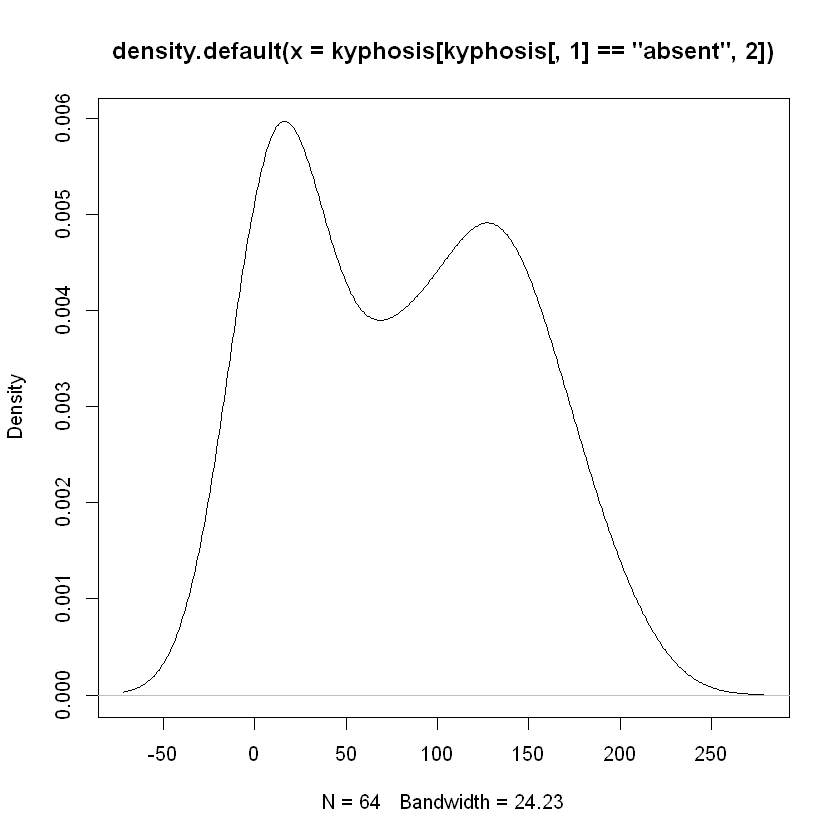

In [1]:
# 关于sweep
a<-matrix(1:5,5,5)
# (1:5) %*% t(1:5)
outer(1:5,1:5)
sweep(a,2,1:5,"*")# 2按列的方向扫
# 还有apply ，by熟练运用
library(rpart)
kyphosis
# 不适合判别分析，不是正态分布
by(kyphosis[,2:4],kyphosis[,1],colMeans)
density(kyphosis[kyphosis[,1]=="absent",2])
plot(density(kyphosis[kyphosis[,1]=="absent",2]))

下面是这个函数使用的一个例子。

In [5]:
y=matrix(rnorm(20),5)
print(y)
x=t(y)%*%y  #构造对称正定矩阵
print(x)
mchol(x)

            [,1]       [,2]       [,3]       [,4]
[1,] -1.19764428 -0.9235326 -1.0831422  1.1628045
[2,]  1.03813351 -1.4686837  2.8729055 -0.1859395
[3,] -0.07854828  0.2558301 -0.7924547  0.1727580
[4,] -0.17775635  0.1333315  1.3444363 -0.9522467
[5,] -1.36485661 -0.4772961  0.2908733 -1.9190851
         [,1]        [,2]      [,3]        [,4]
[1,] 4.412674  0.18901903  3.705942  1.18931794
[2,] 0.189019  3.32098210 -3.381383  0.03240238
[3,] 3.705942 -3.38138290 11.946884 -3.76901763
[4,] 1.189318  0.03240238 -3.769018  6.00619456


2.10063651,0.00000000,0.000000,0.000000
0.08998179,1.82013334,0.000000,0.000000
1.76419963,-1.94498318,2.247560,0.000000
0.56617027,-0.01018751,-2.130164,1.071422


### 前/回代法求解

#### 前代法

> mforward()以方程组的系数矩阵（下三角矩阵）和右端常数项为参数，使用前代法求解方程组，返回方程组的解。

In [6]:
mforwardsolve=function(L,b){
  mn=dim(L); m=mn[1]; n=mn[2]
  if(m!=n) return ("Wrong dimensions of matrix L!")
  if(m!=length(b)) return ("Wrong dimensions of matrix L or vector b!") #检查输入参数是否符合要求
  x=rep(0,m)
  for(i in 1:m){
    x[i]=b[i]/L[i,i]
    if(i<m) b[(i+1):m]=b[(i+1):m]-x[i]*L[(i+1):m,i]   #更新右端项，逐步减去已求出的未知量对右端项的贡献   
  }
  x  
}

下面是使用mforward()的一个例子。

In [7]:
y=matrix(rnorm(20),5)
x=t(y)%*%y
L=mchol(x); b=1:4
mforwardsolve(L,b)
forwardsolve(L,b) #R语言中自带函数的求解结果

[1] 0.4342138 0.8306869 2.0515286 2.5195284

[1] 0.4342138 0.8306869 2.0515286 2.5195284

#### 回代法

mbacksolve()以方程组的系数矩阵（上三角矩阵）和右端常数项为参数，使用回代法求解方程组，返回方程组的解。

In [210]:
mbacksolve=function(L,b){
  mn=dim(L); m=mn[1]; n=mn[2]
  if(m!=n) return ("Wrong dimensions of matrix L!")
  if(m!=length(b)) return ("Wrong dimensions of matrix L or vector b!") #检查输入参数是否符合要求
  x=rep(0,m)
  for(i in m:1){
    x[i]=b[i]/L[i,i]
    if(i>1) b[(i-1):1]=b[(i-1):1]-x[i]*L[(i-1):1,i]   #更新右端项   
  }
  x  
}

下面是使用mbacksolved()的一个例子

In [211]:
y=matrix(rnorm(20),5)
x=t(y)%*%y
L=mchol(x); b=1:4
mforwardsolve(L,b)
forwardsolve(L,b)  #R语言自带函数的求解结果

[1] 0.4774294 1.7102788 1.7666376 0.3248589

[1] 0.4774294 1.7102788 1.7666376 0.3248589

In [212]:
gives <- function(mx, lmx){
    mc <- mx[1]/lmx
    ms <- mx[2]/lmx
    matrix(c(mc,ms,-ms,mc),ncol=2)
}

x=matrix(rnorm(60),10)
xtx=t(x)%*%x
L=mchol(xtx)
L

3.7456220,0.00000000,0.00000000,0.0000000,0.0000000,0.000000
0.9333329,1.54142901,0.00000000,0.0000000,0.0000000,0.000000
-0.7742513,-0.51364899,3.07836426,0.0000000,0.0000000,0.000000
-1.3936391,-0.25990256,-0.04857242,1.4416501,0.0000000,0.000000
-1.3442642,0.00874392,-0.79996526,-2.0763831,1.7163722,0.000000
-0.2256916,-1.53087098,-1.72331470,-0.5223903,-0.8968716,1.447343


In [213]:
L2=L[-2,]
L2
mx <- L2[2,2:3]
lmx <- sqrt(sum(mx*mx))
L2[2,2:3] <- c(lmx,0)
L2[3:5,2:3] <- L2[3:5,2:3] %*% gives(mx, lmx)
L2 

3.7456220,0.00000000,0.00000000,0.0000000,0.0000000,0.000000
-0.7742513,-0.51364899,3.07836426,0.0000000,0.0000000,0.000000
-1.3936391,-0.25990256,-0.04857242,1.4416501,0.0000000,0.000000
-1.3442642,0.00874392,-0.79996526,-2.0763831,1.7163722,0.000000
-0.2256916,-1.53087098,-1.72331470,-0.5223903,-0.8968716,1.447343


3.7456220,0.000000000,0.0000000,0.0000000,0.0000000,0.000000
-0.7742513,3.120923231,0.0000000,0.0000000,0.0000000,0.000000
-1.3936391,-0.005134673,0.2643525,1.4416501,0.0000000,0.000000
-1.3442642,-0.790495501,0.1230355,-2.0763831,1.7163722,0.000000
-0.2256916,-1.447860045,1.7936223,-0.5223903,-0.8968716,1.447343


In [214]:
L[2:2,]

[1] 0.9333329 1.5414290 0.0000000 0.0000000 0.0000000 0.0000000

In [215]:
p <- dim(x)[2]
k <- 2
Lk <- L[-k,]
Lk
mk <- k
while( mk < p ){
    mx <- Lk[mk,mk:(mk+1)]
    lmx <- sqrt(sum(mx*mx))
    Lk[mk,mk:(mk+1)] <- c(lmx,0)
    if( mk < p-1 ) Lk[(mk+1):(p-1), mk:(mk+1)] <- Lk[(mk+1):(p-1), mk:(mk+1)] %*% gives(mx, lmx)
    mk <- mk + 1
}
Lk
Lk <- Lk[,-p]
Lk

xtxk <- xtx[-k, -k]
mchol(xtxk)

3.7456220,0.00000000,0.00000000,0.0000000,0.0000000,0.000000
-0.7742513,-0.51364899,3.07836426,0.0000000,0.0000000,0.000000
-1.3936391,-0.25990256,-0.04857242,1.4416501,0.0000000,0.000000
-1.3442642,0.00874392,-0.79996526,-2.0763831,1.7163722,0.000000
-0.2256916,-1.53087098,-1.72331470,-0.5223903,-0.8968716,1.447343


3.7456220,0.000000000,0.0000000,0.0000000,0.000000,0
-0.7742513,3.120923231,0.0000000,0.0000000,0.000000,0
-1.3936391,-0.005134673,1.4656866,0.0000000,0.000000,0
-1.3442642,-0.790495501,-2.0201406,1.7864685,0.000000,0
-0.2256916,-1.447860045,-0.1903241,-0.3462055,2.496612,0


3.7456220,0.000000000,0.0000000,0.0000000,0.000000
-0.7742513,3.120923231,0.0000000,0.0000000,0.000000
-1.3936391,-0.005134673,1.4656866,0.0000000,0.000000
-1.3442642,-0.790495501,-2.0201406,1.7864685,0.000000
-0.2256916,-1.447860045,-0.1903241,-0.3462055,2.496612


3.7456220,0.000000000,0.0000000,0.0000000,0.000000
-0.7742513,3.120923231,0.0000000,0.0000000,0.000000
-1.3936391,-0.005134673,1.4656866,0.0000000,0.000000
-1.3442642,-0.790495501,-2.0201406,1.7864685,0.000000
-0.2256916,-1.447860045,-0.1903241,-0.3462055,2.496612


In [224]:
mgives <- function(L,k){
    p <- dim(L)[1]
    if( k>p ) return ("Wrong input of k!")
    Lk <- L[-k,]
    mk <- k
    while( mk < p ){
        mx <- Lk[mk,mk:(mk+1)]
        lmx <- sqrt(sum(mx*mx))
        Lk[mk,mk:(mk+1)] <- c(lmx,0)
        if( mk < p-1 ){
            Lk[(mk+1):(p-1), mk:(mk+1)] <- Lk[(mk+1):(p-1), mk:(mk+1)] %*% gives(mx, lmx)
        }
        mk <- mk + 1
    }
    return(Lk[,-p])
}

for (k in 1:dim(L)[1]){
    print("k=")
    print(k)
    print(mgives(L,k))
    xtxk <- xtx[-k, -k]
    print(mchol(xtxk))
}

[1] "k="
[1] 1
           [,1]        [,2]        [,3]       [,4]       [,5]       [,6]
[1,]  17.610907   0.0000000  0.00000000  0.0000000  0.0000000   0.000000
[2,]  27.756172  22.9047849  0.00000000  0.0000000  0.0000000   0.000000
[3,] 485.656377 397.6411660 83.60853293  0.0000000  0.0000000   0.000000
[4,]   1.001156   1.4812052 -1.08102104 14.0952704  0.0000000   0.000000
[5,]   3.043066  -0.2449441 -0.05363625 -0.3961627  3.3941024   0.000000
[6,]   4.732987  -8.0789090 -0.83341591  0.2283026  5.0979862   8.740959
[7,]  52.216971  40.5724640  5.71966913 -2.3150003  0.4207216   1.854414
[8,] 259.876260  65.2180446 53.40433217 17.4881084 76.5877774 104.526750
          [,7]     [,8]
[1,]  0.000000   0.0000
[2,]  0.000000   0.0000
[3,]  0.000000   0.0000
[4,]  0.000000   0.0000
[5,]  0.000000   0.0000
[6,]  0.000000   0.0000
[7,]  7.653326   0.0000
[8,] 95.770640 181.9795
           [,1]        [,2]        [,3]       [,4]       [,5]       [,6]
[1,]  17.610907   0.0000000  0.00000000

In [217]:
forupdate <- function(L, xxk, xkxk){
    lk <- mforwardsolve(L, xxk)
    lkk <- sqrt(xkxk - sum(lk*lk))
    return( as.matrix( rbind( cbind(L,0),c(lk,lkk) ) ) )
}

x <- matrix(rnorm(60),10)
xtx <- t(x)%*%x

A <- c(3,2,4)
L <- mchol(xtx[A,A])
k <- 5
xxk <- xtx[A,k,drop=T] 
xkxk <- xtx[k,k]
forupdate (L, xxk, xkxk)
A <- c(A, k)
mchol(xtx[A,A])

3.2031263,0.00000000,0.000000,0.000000
-0.2575528,2.32428833,0.000000,0.000000
-1.3833042,-0.08223899,1.812585,0.000000
0.5773897,-0.54133247,-1.518096,2.028743


3.2031263,0.00000000,0.000000,0.000000
-0.2575528,2.32428833,0.000000,0.000000
-1.3833042,-0.08223899,1.812585,0.000000
0.5773897,-0.54133247,-1.518096,2.028743


In [218]:
library(ElemStatLearn)
data(prostate)
data <- prostate[,-10]
head(data)

lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829
-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189
-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189
-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189
0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636
-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678


In [219]:
lm1= lm(lpsa~.,data)
summary(lm1)
extractAIC(lm1) #  nln(RSS/n)+ 2*9, not AIC
step(lm1, direction="both")


Call:
lm(formula = lpsa ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76644 -0.35510 -0.00328  0.38087  1.55770 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.181561   1.320568   0.137  0.89096    
lcavol       0.564341   0.087833   6.425 6.55e-09 ***
lweight      0.622020   0.200897   3.096  0.00263 ** 
age         -0.021248   0.011084  -1.917  0.05848 .  
lbph         0.096713   0.057913   1.670  0.09848 .  
svi          0.761673   0.241176   3.158  0.00218 ** 
lcp         -0.106051   0.089868  -1.180  0.24115    
gleason      0.049228   0.155341   0.317  0.75207    
pgg45        0.004458   0.004365   1.021  0.31000    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6995 on 88 degrees of freedom
Multiple R-squared:  0.6634,	Adjusted R-squared:  0.6328 
F-statistic: 21.68 on 8 and 88 DF,  p-value: < 2.2e-16


[1]   9.00000 -60.77886

Start:  AIC=-60.78
lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + 
    pgg45

          Df Sum of Sq    RSS     AIC
- gleason  1    0.0491 43.108 -62.668
- pgg45    1    0.5102 43.569 -61.636
- lcp      1    0.6814 43.740 -61.256
<none>                 43.058 -60.779
- lbph     1    1.3646 44.423 -59.753
- age      1    1.7981 44.857 -58.810
- lweight  1    4.6907 47.749 -52.749
- svi      1    4.8803 47.939 -52.364
- lcavol   1   20.1994 63.258 -25.467

Step:  AIC=-62.67
lpsa ~ lcavol + lweight + age + lbph + svi + lcp + pgg45

          Df Sum of Sq    RSS     AIC
- lcp      1    0.6684 43.776 -63.176
<none>                 43.108 -62.668
- pgg45    1    1.1987 44.306 -62.008
- lbph     1    1.3844 44.492 -61.602
- age      1    1.7579 44.865 -60.791
+ gleason  1    0.0491 43.058 -60.779
- lweight  1    4.6429 47.751 -54.746
- svi      1    4.8333 47.941 -54.360
- lcavol   1   21.3191 64.427 -25.691

Step:  AIC=-63.18
lpsa ~ lcavol + lweight + age + lbph + svi + pgg45




Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi, data = data)

Coefficients:
(Intercept)       lcavol      lweight          age         lbph          svi  
    0.49473      0.54400      0.58821     -0.01644      0.10122      0.71490  


In [244]:
np <- dim(data)
n <- np[1]
p <- np[2]-1
xn <- names(data)[1:p]
x <- as.matrix( cbind(1,data[,1:p]) )
y <- data[,p+1]


xtx <- t(x)%*%x
xty <- drop(t(x)%*%y)
yty <- sum(y*y)


L <- mchol(xtx)
tb <- mforwardsolve(L, xty)
b <- mbacksolve(t(L), tb)
b

RSS <- yty - sum(tb*tb)  ###谁知道为什么，有奖！！！！
AICF <- n*log(RSS/n) + 2*(p+1)
AICF

#A1 <- rep(TRUE, p)
#A <- c(TRUE, A1)

A <- 1:(p+1)
LA <- L
MAIC <- AICF
mAIC <- AICF
flag <- rep(FALSE,p)

[1]  0.181560862  0.564341279  0.622019787 -0.021248185  0.096712523
[6]  0.761673403 -0.106050939  0.049227933  0.004457512

[1] -60.77886

In [245]:
repeat{
    
    #print(flag)
    if( length(A) < p+1 ){
        #B <- setdiff( 1:(p+1), A)
        B <- (2:(p+1))[flag]
        #flag[B-1] <- TRUE
        #print(flag)
    }else{
        B <- NULL
    }
    AB <- c(A,B)
    bm <- matrix(0,p,p+1)
    AICm <- rep(0,p)

    #A <- c(TRUE, A1)
    #a1 <- (1:(p+1))[A]
    #c1 <- (1:(p+1))[!A]
    #tp <- length(a1)
    ff <- 2
    #print(AB)
    for(k in AB[2:(p+1)]){
        if( !flag[k-1]){
            
            Lk <- mgives(LA,ff)
            tA <- A[-ff]
            xtyk <- xty[ tA ]
            #print(Lk)
            #print(xtyk)
            tbk <- mforwardsolve(Lk, xtyk)
            bk <- mbacksolve(t(Lk), tbk)
            #tA <- c(1, tA)
            #print(bk)
            #print(tA)
            bm[k-1,tA] <- bk
            #print(bk)
            RSSk <- yty - sum(tbk*tbk)  
            AICk <- n*log(RSSk/n) + 2*( length(A)-1)
            AICm[k-1] <- AICk
            ff <- ff+1
            if( AICk < mAIC ){
                mink <- k
                mtA <- tA
                mAIC <- AICk
                mLA <- Lk
                hb <- bm[k-1,]
            }
            
        } else {
            #print (k)
            xxk <- xtx[A,k,drop=T] 
            xkxk <- xtx[k,k]
            Lk <- forupdate (LA, xxk, xkxk)
            tA <- c(A,k)
            xtyk <- xty[tA]
            tbk <- mforwardsolve(Lk, xtyk)
            bk <- mbacksolve(t(Lk), tbk)
            
            
            bm[k-1,tA] <- bk
            RSSk <- yty - sum(tbk*tbk)  ###谁知道为什么，有奖！！！！
            AICk <- n*log(RSSk/n) + 2*(length(A)+1)
            AICm[k-1] <- AICk
            if( AICk < mAIC ){
                mink <- k
                mtA <- tA
                mAIC <- AICk
                mLA <- Lk
                hb <- bm[k-1,]
            }            
        }
    }
    #print(bm)
    #print(AICm)
    #print(flag)
    
    if(mAIC >= MAIC) break
    if (mAIC<MAIC ){
        #print(flag)
        flag[mink-1] = !flag[mink-1]
        A <- mtA
        MAIC <- mAIC
        print(MAIC)
        hhb <- hb
        LA <- mLA
    }

}
re <- data.frame(matrix(hhb[c(TRUE,!flag)],nrow=1))
names(re) <- c("inter", xn[!flag])
re

#}

[1] -62.66823
[1] -63.17571
[1] -63.72263


inter,lcavol,lweight,age,lbph,svi
0.4947293,0.5439979,0.5882127,-0.01644485,0.1012233,0.714904


In [248]:
steplm <- function(data){
    np <- dim(data)
    n <- np[1]
    p <- np[2]-1
    xn <- c("inter", names(data)[1:p])
    x <- as.matrix( cbind(1,data[,1:p]) )
    y <- data[,p+1]


    xtx <- t(x)%*%x
    xty <- drop(t(x)%*%y)
    yty <- sum(y*y)


    L <- mchol(xtx)
    tb <- mforwardsolve(L, xty)
    b <- mbacksolve(t(L), tb)
    #b

    RSS <- yty - sum(tb*tb)  ###谁知道为什么，有奖！！！！
    AICF <- n*log(RSS/n) + 2*(p+1)
    #AICF

#A1 <- rep(TRUE, p)
#A <- c(TRUE, A1)

    A <- 1:(p+1)
    LA <- L
    MAIC <- AICF
    mAIC <- AICF
    MFLAG <- c(TRUE, rep(FALSE, p))
    flag <- rep(TRUE,p+1)
    hbb <- b
    repeat{
        if( length(A) < p+1 ){
             B <- (1:(p+1))[!flag]
        }
        else{
            B <- NULL
        }
        AB <- c(A,B)
        bm <- matrix(0,p,p+1)
        AICm <- rep(0,p)

        ff <- 1
        #print(AB)
        for(k in AB){
            if(MFLAG[k]){
                ff <- ff+1
            } else {
                if(flag[k]){
                    Lk <- mgives(LA,ff)
                    tA <- A[-ff]
                    xtyk <- xty[ tA ]
                    ff <- ff+1
                } else {
                    xxk <- xtx[A,k,drop=T] 
                    xkxk <- xtx[k,k]
                    Lk <- forupdate (LA, xxk, xkxk)
                    tA <- c(A,k)
                    xtyk <- xty[tA]
                }
                #print(A)
                #print(B)
                #print(k)
                tbk <- mforwardsolve(Lk, xtyk)
                bk <- mbacksolve(t(Lk), tbk)
            #tA <- c(1, tA)
                #print(tbk)
            #print(tA)
                bm[k-1,tA] <- bk
            #print(bk)
                RSSk <- yty - sum(tbk*tbk)  
                AICk <- n*log(RSSk/n) + 2*length(tA)
                AICm[k-1] <- AICk
       
                if( AICk < mAIC ){
                    mink <- k
                    mtA <- tA
                    mAIC <- AICk
                    mLA <- Lk
                    hb <- bm[k-1,]
                }
            }
        }

        if(mAIC >= MAIC) break
        if ( mAIC<MAIC ){
            flag[mink] = !flag[mink]
            A <- mtA
            MAIC <- mAIC
            hhb <- hb
            LA <- mLA
        }

    }
    re <- data.frame(matrix(hhb[c(flag)],nrow=1))
    names(re) <- xn[flag]
    return(re)
}
steplm(data)
data <- data[,c(sample(1:8,8),9)]
steplm(data)

inter,lcavol,lweight,age,lbph,svi
0.4947293,0.5439979,0.5882127,-0.01644485,0.1012233,0.714904


inter,svi,age,lbph,lcavol,lweight
0.4947293,0.714904,-0.01644485,0.1012233,0.5439979,0.5882127


In [8]:
coef(step(lm1, direction="both"))

ERROR: Error in terms(object): 找不到对象'lm1'


注：理论部分参考：徐树方, 高立, 张平文. 数值线性代数.第2版[M]. 北京大学出版社, 2013.